# Gold Price Prediction using ML

## Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("gld_price_data.csv")

In [3]:
df.head(5)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
df.size

13740

In [5]:
df.shape

(2290, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [8]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
df = df.drop('Date', axis=1)

In [10]:
df.head(2)

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.180,1.471692
1,1447.160034,85.570000,78.370003,15.285,1.474491


## Data Visualization

In [11]:
df.corr()

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<Axes: >

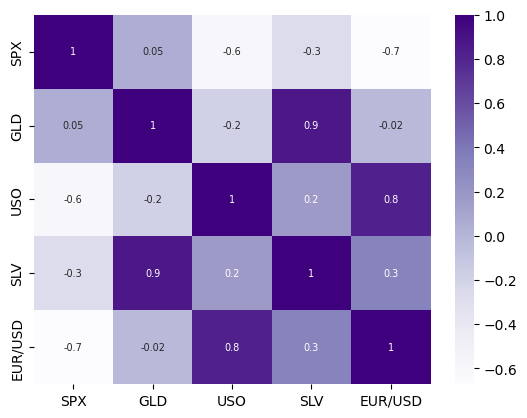

In [12]:
sns.heatmap(df.corr(), annot= True ,annot_kws = {'size':7}, fmt ='.1g', cmap ='Purples')

C:\Users\Shiva\AppData\Local\Temp\ipykernel_23668\2977912514.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GLD'] ,color ='Blue')


<Axes: xlabel='GLD', ylabel='Density'>

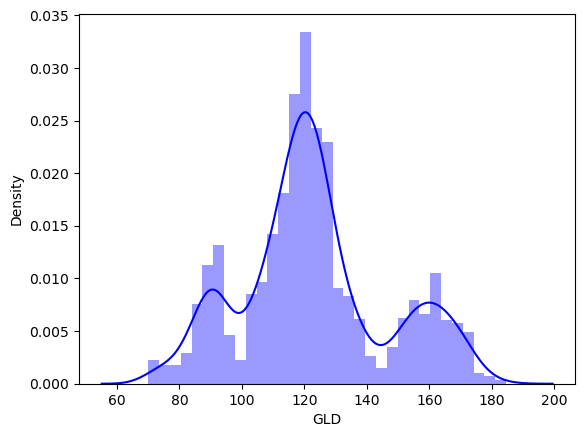

In [13]:
sns.distplot(df['GLD'] ,color ='Blue')

<Axes: ylabel='GLD'>

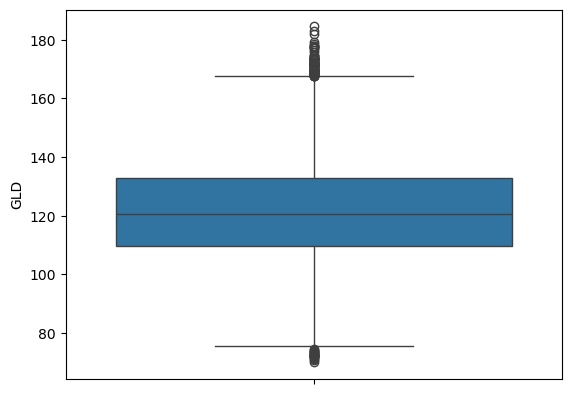

In [14]:
sns.boxplot(df.GLD)

<Axes: xlabel='SPX', ylabel='Count'>

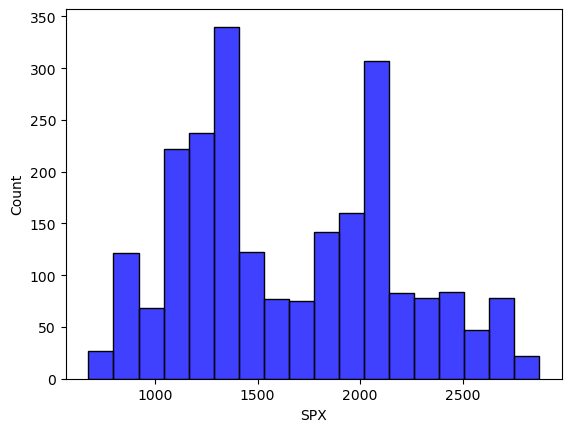

In [15]:
sns.histplot(df['SPX'] ,color ='b')

C:\Users\Shiva\AppData\Local\Temp\ipykernel_23668\1603132311.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SLV'] ,color ='Blue')


<Axes: xlabel='SLV', ylabel='Density'>

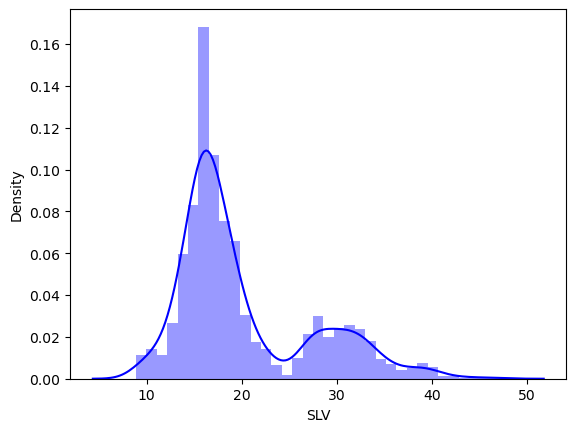

In [16]:
sns.distplot(df['SLV'] ,color ='Blue')

In [17]:
from pandas_profiling import ProfileReport
ProfileReport(df)

C:\Users\Shiva\AppData\Local\Temp\ipykernel_23668\2181367630.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Train test and split

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x= df.drop(['GLD'], axis = 1)
y =df['GLD']

In [20]:
x.head(5)

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


In [21]:
y.head(5)

0    84.860001
1    85.570000
2    85.129997
3    84.769997
4    86.779999
Name: GLD, dtype: float64

In [22]:
X_train,X_test,y_train,y_test= train_test_split(x,y, test_size =0.2, random_state = 40)

## Model Training & Evaluation

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import metrics

In [24]:
randomforest_model = RandomForestRegressor(n_estimators=100,random_state=40)

In [25]:
svm = SVR(kernel = 'linear')

In [26]:
randomforest_model.fit(X_train,y_train)

RandomForestRegressor(random_state=40)

In [27]:
randomforest_model.score(X_train , y_train)

0.9984080900419606

In [28]:
randomforest_model.score(X_test , y_test)

0.9881681370572407

In [29]:
y_pred =randomforest_model.predict(X_test)

In [30]:
squared_error = metrics.r2_score(y_test,y_pred)
print("R2 score is: ",squared_error)

R2 score is:  0.9881681370572407


In [31]:
Y_test = list(y_test)

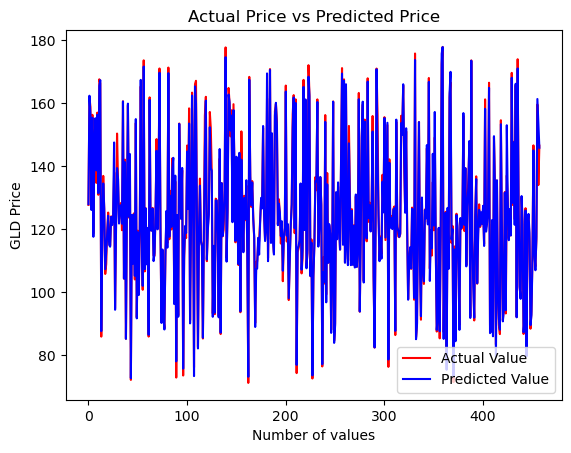

In [32]:
plt.plot(Y_test, color='red', label = 'Actual Value')
plt.plot(y_pred, color='blue', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()